In [36]:
import pandas as pd
#récupération du df nettoyé
data = pd.read_pickle("data_cleaned.pkl")



# Projet 2 : Explorer et comprendre les performances des employés  

## Problématique métier:  
Une entreprise souhaite analyser la répartition des performances des employés pour comprendre les écarts et identifier les outliers.  
  
  
## Objectif:  
Étudier les distributions des scores de performance et des heures travaillées pour détecter les facteurs d'amélioration.

## Etapes: 
1/Exploration du fichier et nettoyage des données.==>Fait  
2/Choix des indicateurs  
3/Statistiques descriptives : Moyenne, médiane, mode, quartiles, variance, écart-type.  
4/Visualisation des distributions : Histogrammes, boxplots, pie chart, diagramme en barre.  
5/Détection et analyse des outliers avec la règle des 1.5 * IQR.

règle des 1.5IQR: La valeur est un outlier si :
Inférieure à Q1 - 1.5 * IQR
Supérieure à Q3 + 1.5 * IQR

In [37]:
stats_descriptives=data.describe()
stats_descriptives

,EmpID,GenderID,PerfScoreID,Salary,PositionID,Zip,DOB,DateofHire,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311,311,104,311.000000,311.000000,311.000000,311.000000,311,311.000000,311.000000
mean,10156.000000,0.434084,2.983923,69020.684887,16.845659,6555.482315,1979-02-06 09:48:02.315112544,2013-02-03,2015-06-14,15.199357,4.110000,3.890675,1.218650,2017-09-10,0.414791,10.237942
min,10001.000000,0.000000,1.000000,45046.000000,1.000000,1013.000000,1951-01-02 00:00:00,2006-01-09,2010-08-30,1.000000,1.120000,1.000000,0.000000,2010-07-14,0.000000,1.000000
25%,10078.500000,0.000000,3.000000,55501.500000,18.000000,1901.500000,1973-12-03 00:00:00,2011-07-11,2014-01-10,10.000000,3.690000,3.000000,0.000000,2016-03-19,0.000000,5.000000
50%,10156.000000,0.000000,3.000000,62810.000000,19.000000,2132.000000,1980-09-30 00:00:00,2013-02-18,2015-09-22,16.000000,4.280000,4.000000,0.000000,2019-01-16,0.000000,10.000000
75%,10233.500000,1.000000,3.000000,72036.000000,20.000000,2355.000000,1986-05-29 12:00:00,2014-09-23,2016-09-08,19.500000,4.700000,5.000000,0.000000,2019-02-04,0.000000,15.000000
max,10311.000000,1.000000,4.000000,250000.000000,30.000000,98052.000000,1992-08-17 00:00:00,2018-07-09,2018-11-10,39.000000,5.000000,5.000000,8.000000,2019-02-28,6.000000,20.000000
std,89.922189,0.496435,0.576193,25156.636930,6.223419,16908.396884,NaN,NaN,NaN,8.864507,0.789938,0.909241,2.349421,NaN,1.294519,5.852596


### Choix des indicateurs :  
L'entreprise cherche à connaître les performances des employés:  
Ici nous avons la variable 'PerfScoreID' qui va mesurer la performance.  
Pour chercher les facteurs pouvant impacter la performance on a 'EmpSatisfaction','EngagementSurvey'.  C'est indicateurs pourront eux mêmes être corrélés avec 'Absences', 'DaysLateLast30', 'SpecialProjectsCount','ManagerID', 'Salary' et 'PositionID'.	

####  Choix indicateurs:  
##### Performance: 
**Mise en contexte :**  
* Nombre d'employés  
* Nombre d'embauches/ Nombre de départs sur cette année
* Ancienneté moyenne  
  
**Mesure de la performance:**  
* Stats descriptives et identification des outliers ==> boîte à moustache  
* Affichage des meilleurs performers et moins bons  
* % des employés avec un score de 3 ou 4.  (objectif 3)
* % des employés avec un score de 1.  
* Affichage de la distribution des performances.  
  
**Mesure de la satisfaction et engagement:**  
* Stats descriptives et identification des outliers ==> boîte à moustache  
* % des employés avec un score de 4 ou 5.  
* % des employés avec un score de 2 ou 1.  
* Affichage de la distribution de l'engagement et la satisfaction.  
  
**Mise en corrélation:**  
* Corrélation performance, satisfation, engagement. Déterminer des objectifs pour obtenir la performance de voulue.  
* Engagement et absences, retards, nombre de projets, manageur, salaire (comparer avec la moyenne nationale) et poste.  
* Monter l'impact sur les absences et retards (avec des %)  
* Proposer de des léviers pour améliorer les perf. (Pareto)  
  





In [38]:
#Mise en contexte
#nombre employés
nombre_employés=len(data.loc[data['DateofTermination'].isna()])

#embauches départs sur 2018
date_référence_N=pd.to_datetime('01/01/2018')
nombre_embauches_N=len(data.loc[data['DateofHire']>date_référence_N])
nombre_departs_N=len(data.loc[data['DateofTermination']>date_référence_N])
rapport_embauches_departs_N=nombre_embauches_N/nombre_departs_N

#ancienneté moyenne
# Convertir les colonnes en datetime64 (Pandas standard)
data['DateofHire'] = pd.to_datetime(data['DateofHire'])
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])

# Calcul de la séniorité
data['Seniority'] = (data['DateofTermination'] - data['DateofHire']).where(
    data['DateofTermination'].notna(),
    pd.to_datetime('today') - data['DateofHire']
).dt.days  # Convertit en nombre de jours

ancienete_moyenne_annees=round((data['Seniority']).mean()/365.25,2)


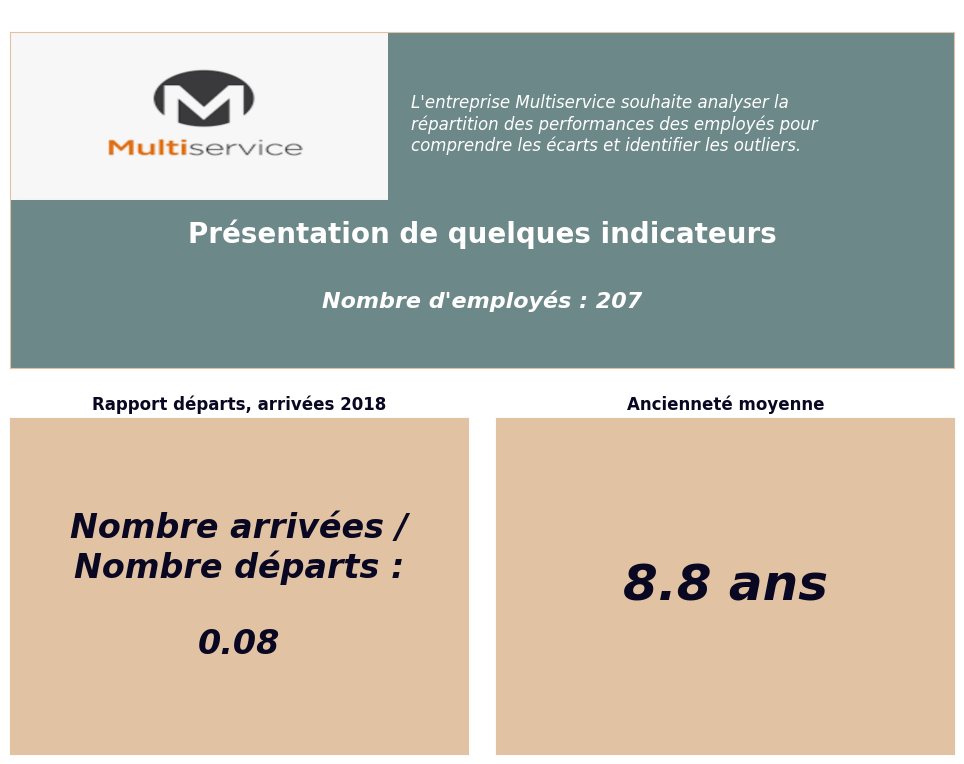

In [39]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec 
import seaborn as sns
import textwrap

# Visualisation contexte
fig = plt.figure(figsize=(10, 8))

gs = gridspec.GridSpec(nrows=2, ncols=2) 

# Créer les subplots 
ax1 = fig.add_subplot(gs[0, :])  # Premier subplot en haut  
ax2 = fig.add_subplot(gs[1, 0])  # Deuxième subplot en bas à gauche 
ax3 = fig.add_subplot(gs[1, 1])   # Troisième subplot en bas à droite

for ax in [ax1, ax2, ax3]: #enlever les axes sans enlever la couleur de fond 
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():  # Supprime les bordures des subplots
        spine.set_color((225/255,195/255,163/255)) #almond


ax1.set_title('Description projet', color='white', weight='bold')
ax1.patch.set_facecolor((108/255,136/255,137/255))
ax2.set_title('Rapport départs, arrivées 2018', color=(9/255,7/255,34/255), weight='bold')
ax2.set_facecolor((225/255,195/255,163/255))
ax3.set_title('Ancienneté moyenne', color=(9/255,7/255,34/255), weight='bold')
ax3.set_facecolor((225/255,195/255,163/255))

#texte axe 1
wrapped1 = textwrap.fill(f'L\'entreprise Multiservice souhaite analyser la répartition des performances des employés pour comprendre les écarts et identifier les outliers.', 
                        width=56)
wrapped2 = textwrap.fill(f'Présentation de quelques indicateurs', 
                        width=80)
wrapped3 = textwrap.fill(f'Nombre d\'employés : {nombre_employés}', 
                        width=70)

ax1.text(4.25,#x
         7.25, #y
         wrapped1, 
         fontsize=12, 
         color='white', 
         ha='left',  # alignement horizontal
         va='center',  # alignement vertical
         fontstyle='italic')  # style
ax1.text(5,#x
         4, #y
         wrapped2,
         fontsize=20,
         fontweight='bold',  
         color='white',  # couleur
         ha='center',  # alignement horizontal
         va='center',  # alignement vertical
         )  
ax1.text(5,#x
         2, #y
         wrapped3,
         fontsize=16,
         fontweight='bold',  
         color='white',  # couleur
         ha='center',  # alignement horizontal
         va='center',  # alignement vertical
         fontstyle='italic')  # style

ax1.set_ylim(0,10)
ax1.set_xlim(0,10)
logo= mpimg.imread('D:/Documents/VSCode/Projet HR sur python/logo.png')#ajout logo
ax1.imshow(logo, aspect='auto', extent=[0, 4, 5, 10])

#texte axe2
ax2.set_ylim(0,10)
ax2.set_xlim(0,10)
wrapped4 = textwrap.fill(f'Nombre arrivées / Nombre départs : ', 
                        width=20)
wrapped5 = textwrap.fill(f'{rapport_embauches_departs_N:.2f}', width=20)
ax2.text(5,#x
         5, #y
         wrapped4 + '\n\n' + wrapped5,
         fontsize=24,
         fontweight='bold',  
         color=(9/255,7/255,34/255),  # couleur
         ha='center',  # alignement horizontal
         va='center',  # alignement vertical
         fontstyle='italic')  # style

#texte axe3
ax3.set_ylim(0,10)
ax3.set_xlim(0,10)
wrapped6 = textwrap.fill(f'{ancienete_moyenne_annees:.1f} ans', width=20)
ax3.text(5,#x
         5, #y
         wrapped6,
         fontsize=36,
         fontweight='bold',  
         color=(9/255,7/255,34/255),  # couleur
         ha='center',  # alignement horizontal
         va='center',  # alignement vertical
         fontstyle='italic')  # style
       
plt.tight_layout(pad=2)

plt.show()


In [40]:
#Performance
perf=data.iloc[:,2:3].describe().round(2)
perf=perf.reset_index()
perf=perf.rename(columns={'index':'Statistique', 'PerfScoreID': 'Scores de performance'})
perf.iloc[3,0]='Min'
perf.iloc[4,0]='Q25%'
perf.iloc[5,0]='Médiane'
perf.iloc[6,0]='Q75%'
perf.iloc[7,0]='Max'
perf=perf.drop(index=[0,1,2])

perf




,Statistique,Scores de performance
3,Min,1.0
4,Q25%,3.0
5,Médiane,3.0
6,Q75%,3.0
7,Max,4.0


Mon 1er, 2eme et 3eme quartilles ont la même valeur donc la boîte à moustache n'est pas intéressante dans ce cas. je vais donc plutôt afficher les valeurs sous forme de tableau.

In [41]:
import seaborn as sns
import matplotlib
# Calcul des effectifs
effectifs = data["PerfScoreID"].value_counts()  
effectifs=effectifs.sort_index(ascending=False)
# Extraction des modalités
modalites = effectifs.index

# Création de la table de fréquence
tab_perf = pd.DataFrame(modalites, columns=["PerfScoreID"])


# Ajout de la colonne des effectifs
tab_perf["n"] = effectifs.values  

# Ajout de la colonne des fréquences (pourcentages)
tab_perf["%"] = ((tab_perf["n"] / len(data)) * 100)
tab_perf["%"] = tab_perf["%"].map(lambda x: f"{x:.1f}")

# Renommer les colonnes
tab_perf = tab_perf.rename(columns={'PerfScoreID': 'Score de performance', 'n': 'Effectifs'})


"""# Personnalisation des styles
tab_perf = tab_perf.style \
    .set_table_styles([  
        {'selector': 'thead th', 'props': [('background-color', 'indigo'), ('color', 'white'), ('font-weight', 'bold')]},  
        {'selector': 'thead', 'props': [('text-align', 'center')]},  
        {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'lavender'), ('color', 'black')]},  
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white'), ('color', 'black')]},  
    ]) \
    .set_properties(**{'text-align': 'center'})"""  


tab_perf["%"]=tab_perf["%"].astype(float)

tab_perf



,Score de performance,Effectifs,%
0,4,37,11.9
1,3,244,78.5
2,2,18,5.8
3,1,12,3.9


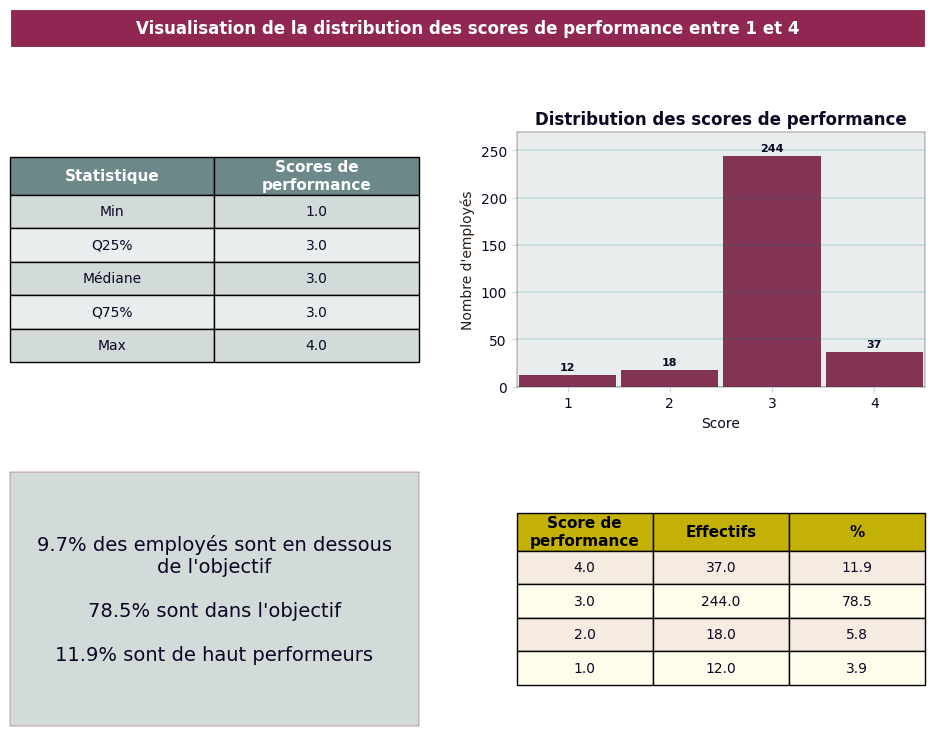

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap



#Visualisation performances
fig2 = plt.figure(figsize=(10, 8))

gs2 = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[0.15, 1, 1]) 

# Créer les subplots 
ax4 = fig2.add_subplot(gs2[0, :])  # Premier subplot en haut  
ax5 = fig2.add_subplot(gs2[1, 0])  # Deuxième subplot en bas à gauche 
ax6 = fig2.add_subplot(gs2[1, 1])
ax7 = fig2.add_subplot(gs2[2, 0])
ax8 = fig2.add_subplot(gs2[2, 1])
#Axe 1 : texte
ax4.set_xticks([])
ax4.set_yticks([])  # On désactive l'axe pour qu'il n'y ait pas de graphique
for spine in ax4.spines.values():  # Supprime les bordures des subplots
    spine.set_color('white')
ax4.set_facecolor((144/255,39/255,83/255)) #rose
ax4.text(0.5, 0.5, #positions x, y 

        'Visualisation de la distribution des scores de performance entre 1 et 4',  

        fontsize=12, #taille 

        color='white', #couleur 

        ha='center', #alignement horizontal 

        va='center', #alignement vertical 

        weight='bold'
        )


# Axe 2 : Tableau des quartilles
ax5.axis('off')
table = ax5.table(cellText=perf.values, colLabels=perf.columns,
                  loc='center', cellLoc='center', 
                  colColours=['#f5f5f5']*len(perf.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Appliquer des couleurs personnalisées pour les en-têtes
for (i, j), cell in table.get_celld().items():
    if i == 0:  # En-tête
        cell.set_fontsize(11)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor((108/255,136/255,137/255))
        wrapped_text = textwrap.fill(cell.get_text().get_text(), width=11)  # Ajuster la largeur à tes besoins
        cell.set_text_props(text=wrapped_text, ha='center', va='center')  # Centrer également
        cell.set_height(0.15)
    else:  # Corps du tableau
        if i % 2 == 0:  # Lignes paires
            cell.set_facecolor((233/255,237/255,237/255))
        else:  # Lignes impaires
            cell.set_facecolor((210/255,218/255,218/255))
        
        cell.set_text_props(color=(9/255,7/255,34/255))
        # Utilisation de textwrap pour couper le texte
        wrapped_text = textwrap.fill(cell.get_text().get_text(), width=10)  # Ajuster la largeur à tes besoins
        cell.set_text_props(text=wrapped_text, ha='center', va='center')  # Centrer également

# Axe 3 : Bar plot de distribution des scores
tab_perf_ascending=tab_perf.sort_values(by='Score de performance',ascending=True)
barplot_perf=sns.barplot(data=tab_perf_ascending,
                         x='Score de performance',
                         y='Effectifs',
                         ax=ax6,
                         width=0.95,
                         color=(144/255,39/255,83/255))
ax6.set_title('Distribution des scores de performance',color=(9/255,7/255,34/255),weight='bold')
ax6.set_xlabel('Score', color=(9/255,7/255,34/255))  
ax6.set_ylabel('Nombre d\'employés',color=(39/255,30/255,22/255)) 
ax6.set_facecolor((233/255,237/255,237/255))  
ax6.set_ylim(0, ax6.get_ylim()[1] * 1.05)  # Augmente la hauteur de 5%
for spine in ax6.spines.values(): #couleur bordures
    spine.set_color((39/255,30/255,22/255))
    spine.set_linewidth(0.3)
ax6.grid(True, axis='y', which='major', linewidth=0.2, color='teal')
ax6.tick_params(axis='both', 
                labelcolor=(9/255,7/255,34/255), 
                color=(210/255,218/255,218/255))#couleur des axes

# Ajouter des labels aux barres
barplot_perf.bar_label(barplot_perf.containers[0],
                       labels=tab_perf_ascending['Effectifs'],
                       label_type='edge', padding=2,
                       color=(9/255,7/255,34/255),
                       fontsize=8, weight='bold')



# Axe 4 : Affichage des % des top et under performers
ax7.set_xticks([])
ax7.set_yticks([])  # On désactive l'axe pour qu'il n'y ait pas de graphique
for spine in ax7.spines.values():  # Supprime les bordures des subplots
    spine.set_color((9/255,7/255,34/255))
ax7.set_facecolor((210/255,218/255,218/255))
for spine in ax7.spines.values(): #couleur bordures
    spine.set_color((144/255,39/255,83/255))
    spine.set_linewidth(0.3)
wrapped_perf_en_dessous = textwrap.fill(f'{tab_perf.iloc[2,2]+tab_perf.iloc[3,2]}% des employés sont en dessous de l\'objectif', width=35)
wrapped_dans_objectif=textwrap.fill(f'{tab_perf.iloc[1,2]}% sont dans l\'objectif', width=38)
wrapped_haut_performers=textwrap.fill(f'{tab_perf.iloc[0,2]}% sont de haut performeurs', width=38)
wrapped_text_combined = wrapped_perf_en_dessous + "\n\n" + wrapped_dans_objectif + "\n\n" + wrapped_haut_performers
ax7.text(0.5, 0.5,wrapped_text_combined, ha='center', va='center', fontsize=14, color=(9/255,7/255,34/255))

#Axe 5 : Tableau de distribution des scores
ax8.axis('off')  # axe désactivé
table = ax8.table(cellText=tab_perf.values, colLabels=tab_perf.columns, loc='center')

# Personnalisation des styles (couleurs et alignement)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Appliquer des couleurs personnalisées pour les en-têtes
for (i, j), cell in table.get_celld().items():
    if i == 0:  # En-tête
        cell.set_fontsize(11)
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor((196/255,177/255,8/255))
        wrapped_text = textwrap.fill(cell.get_text().get_text(), width=11)  # Ajuster la largeur à tes besoins
        cell.set_text_props(text=wrapped_text, ha='center', va='center')  # Centrer également
        cell.set_height(0.15)
        
    else:  # Corps du tableau
        if i % 2 == 0:  # Lignes paires
            cell.set_facecolor((254/255,252/255,235/255))
        else:  # Lignes impaires
            cell.set_facecolor((245/255,235/255,224/255))
        
        cell.set_text_props(color=(9/255,7/255,34/255))
        # Utilisation de textwrap pour couper le texte
        wrapped_text = textwrap.fill(cell.get_text().get_text(), width=10)  # Ajuster la largeur à tes besoins
        cell.set_text_props(text=wrapped_text, ha='center', va='center')  # Centrer également

# Ajuster les espacements
plt.tight_layout(pad=3)

# Afficher la figure
plt.show()


**Mesure de la satisfaction et engagement:**  
* Stats descriptives et identification des outliers ==> boîte à moustache  
* % des employés avec un score de 4 ou 5.  
* % des employés avec un score de 2 ou 1.  
* Affichage de la distribution de l'engagement et la satisfaction.

In [43]:
#calcul des indicateurs de satisfaction et engagement
#colonnes : EngagementSurvey et EmpSatisfaction

data['EmpSatisfaction'].describe() #==>boite à moustache
data['EngagementSurvey'].describe() #==>boite à moustache

#distribution scores satisfaction pour les employés encore en poste:
employes_actifs=data.loc[data['DateofTermination'].isna()]
tableau_satisfaction=employes_actifs.groupby('EmpSatisfaction')['EmpSatisfaction'].count()
tableau_satisfaction=tableau_satisfaction.to_frame()
tableau_satisfaction = tableau_satisfaction.rename(columns={'EmpSatisfaction': 'effectifs'})
tableau_satisfaction.reset_index(inplace=True)
tableau_satisfaction = tableau_satisfaction.rename(columns={'EmpSatisfaction': 'Score de satisfaction'})
tableau_satisfaction['frequence']=tableau_satisfaction['effectifs']/len(employes_actifs)

tableau_engagement=employes_actifs.copy()
tableau_engagement['Score engagement']=pd.cut(tableau_engagement['EngagementSurvey'], bins=5,labels=[1,2,3,4,5])
tableau_engagement=tableau_engagement.groupby('Score engagement')['Score engagement'].count()
tableau_engagement=tableau_engagement.to_frame()
tableau_engagement=tableau_engagement.rename(columns={'Score engagement':'effectifs'})
tableau_engagement['frequence']=tableau_engagement['effectifs']/len(employes_actifs)
tableau_engagement.reset_index(inplace=True)
tableau_engagement








C:\Users\mlleI\AppData\Local\Temp\ipykernel_16932\1043481427.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tableau_engagement=tableau_engagement.groupby('Score engagement')['Score engagement'].count()


,Score engagement,effectifs,frequence
0,1,4,0.019324
1,2,8,0.038647
2,3,26,0.125604
3,4,62,0.299517
4,5,107,0.516908


In [44]:
import scipy.stats as st
import numpy as np
pearson=st.pearsonr(employes_actifs["EmpSatisfaction"],employes_actifs["EngagementSurvey"])[0]
cov=np.cov(employes_actifs["EmpSatisfaction"],employes_actifs["EngagementSurvey"],ddof=0)[1,0]


In [45]:
employes_actifs['engagement_class']=pd.cut(employes_actifs['EngagementSurvey'], bins=[1,2,3,4,5])
employes_actifs['engagement_class'].unique()

C:\Users\mlleI\AppData\Local\Temp\ipykernel_16932\1464787917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employes_actifs['engagement_class']=pd.cut(employes_actifs['EngagementSurvey'], bins=[1,2,3,4,5])


[(4, 5], (3, 4], (1, 2], (2, 3]]
Categories (4, interval[int64, right]): [(1, 2] < (2, 3] < (3, 4] < (4, 5]]

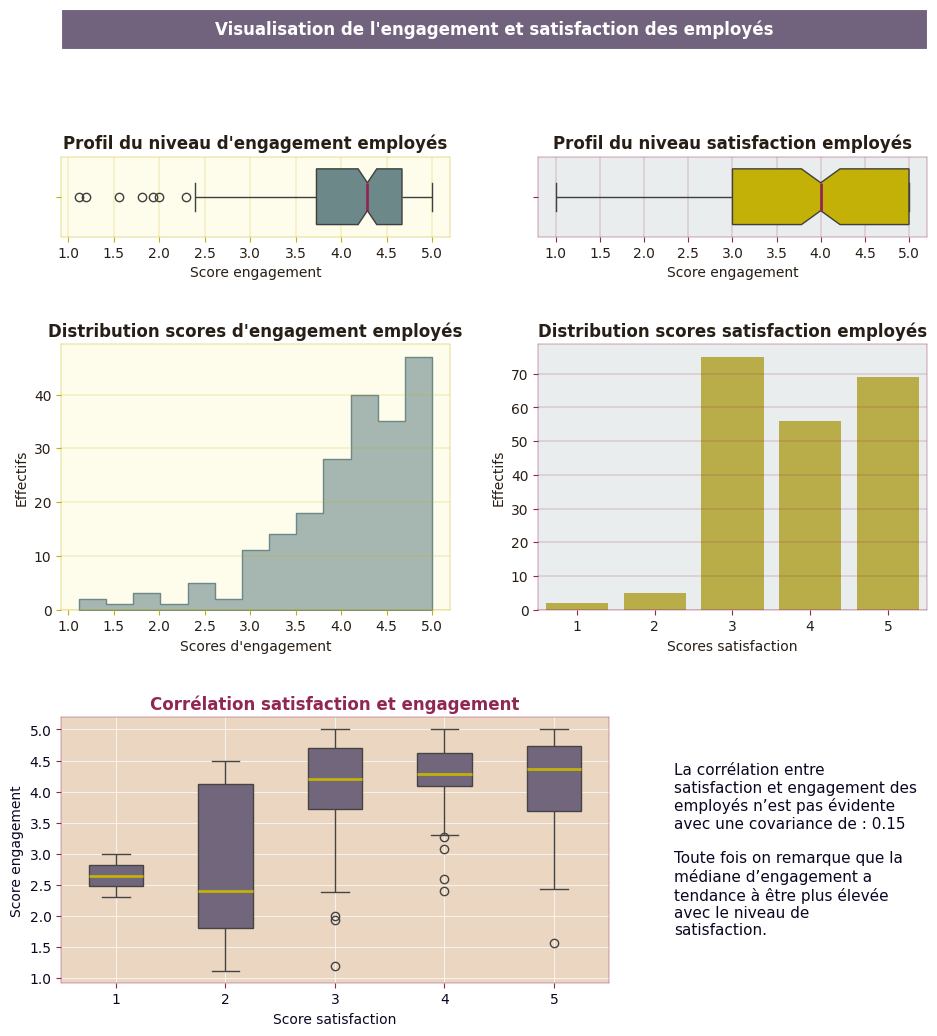

In [64]:
import mplcursors #rendre le graphique intéractif
import numpy as np
# Créer la figure et le gridspec 

fig3 = plt.figure(figsize=(10, 11)) 

gs3 = gridspec.GridSpec(nrows=4, ncols=6, height_ratios=[0.15, 0.3, 1,1]) #config ratios en colonnes et lignes 

# Créer les subplots 

ax9 = fig3.add_subplot(gs3[0, :])  # titre en haut

ax10 = fig3.add_subplot(gs3[1, 0:3])  #boite à moustache engagement

ax11 = fig3.add_subplot(gs3[1, 3:6])   #boite à moustache satisfaction

ax12 = fig3.add_subplot(gs3[2, 0:3])   #distribution engagement

ax13 = fig3.add_subplot(gs3[2, 3:6])   #distribution satisfaction

ax14 = fig3.add_subplot(gs3[3, 0:4])   #correl engagement satisfaction

ax15 = fig3.add_subplot(gs3[3, 4:6])   #texte

#Axe 1 : Titre 

ax9.set_xticks([])
ax9.set_yticks([])  # On désactive l'axe pour qu'il n'y ait pas de graphique
for spine in ax9.spines.values():  # Supprime les bordures des subplots
    spine.set_color('white')
ax9.set_facecolor((113/255,99/255,126/255)) 
ax9.text(0.5, 0.5, #positions x, y 

        'Visualisation de l\'engagement et satisfaction des employés',  

        fontsize=12, #taille 

        color='white', #couleur 

        ha='center', #alignement horizontal 

        va='center', #alignement vertical 
        
        fontweight='bold'
        )

# Axe 2 : boite à moustache engagement
boite_engagement=sns.boxplot(data=employes_actifs, 
                            x='EngagementSurvey', 
                            ax=ax10,
                            width=0.7, 
                            notch=True,
                            boxprops={"facecolor": (108/255,136/255,137/255)},
                            medianprops={"color": (144/255,39/255,83/255), "linewidth": 2},)
ax10.set_title('Profil du niveau d\'engagement employés',color=(39/255,30/255,22/255),weight='bold')
ax10.set_xlabel('Score engagement', color=(39/255,30/255,22/255))  
ax10.set_facecolor((254/255,252/255,235/255))  
for spine in ax10.spines.values(): #couleur bordures
    spine.set_color((196/255,177/255,8/255))
    spine.set_linewidth(0.3)
ax10.grid(True, axis='x', which='major', linewidth=0.2, color=(196/255,177/255,8/255))
ax10.tick_params(axis='both', labelcolor=(39/255,30/255,22/255), color=(196/255,177/255,8/255))#couleur des axes

# Axe 3 : boite à moustache satisfaction
boite_satisfaction=sns.boxplot(data=employes_actifs, 
                            x='EmpSatisfaction', 
                            ax=ax11,
                            width=0.7, 
                            notch=True,
                            boxprops={"facecolor": (196/255,177/255,8/255)},
                            medianprops={"color": (144/255,39/255,83/255), "linewidth": 2},)
ax11.set_title('Profil du niveau satisfaction employés',color=(39/255,30/255,22/255),weight='bold')
ax11.set_xlabel('Score engagement', color=(39/255,30/255,22/255))  
ax11.set_facecolor((233/255,237/255,237/255))  
for spine in ax11.spines.values(): #couleur bordures
    spine.set_color((144/255,39/255,83/255))
    spine.set_linewidth(0.3)
ax11.grid(True, axis='x', which='major', linewidth=0.2, color=(144/255,39/255,83/255))
ax11.tick_params(axis='both', labelcolor=(39/255,30/255,22/255), color=(144/255,39/255,83/255))#couleur des axes

#distributions engagement     
sns.histplot(
    data=employes_actifs, x="EngagementSurvey",element="step",
    stat="count", common_norm=False, ax=ax12, color=(108/255,136/255,137/255), alpha=0.6
)
ax12.set_title('Distribution scores d\'engagement employés',weight='bold', color=(39/255,30/255,22/255))
ax12.set_ylabel('Effectifs', color=(39/255,30/255,22/255))
ax12.set_xlabel('Scores d\'engagement', color=(39/255,30/255,22/255))
ax12.set_facecolor((254/255,252/255,235/255))  
for spine in ax12.spines.values(): #couleur bordures
    spine.set_color((196/255,177/255,8/255))
    spine.set_linewidth(0.3)
ax12.grid(True, axis='y', which='major', linewidth=0.2, color=(196/255,177/255,8/255))
ax12.tick_params(axis='both', labelcolor=(39/255,30/255,22/255), color=(196/255,177/255,8/255))#couleur des axes

#distributions satisfaction     
sns.barplot(
    data=tableau_satisfaction, x="Score de satisfaction", y='effectifs',
    ax=ax13, color=(196/255,177/255,8/255), alpha=0.8
)
ax13.set_title('Distribution scores satisfaction employés',weight='bold', color=(39/255,30/255,22/255))
ax13.set_ylabel('Effectifs', color=(39/255,30/255,22/255))
ax13.set_xlabel('Scores satisfaction', color=(39/255,30/255,22/255))
ax13.set_facecolor((233/255,237/255,237/255))  
for spine in ax13.spines.values(): #couleur bordures
    spine.set_color((144/255,39/255,83/255))
    spine.set_linewidth(0.3)
ax13.grid(True, axis='y', which='major', linewidth=0.2, color=(144/255,39/255,83/255))
ax13.tick_params(axis='both', labelcolor=(39/255,30/255,22/255), color=(144/255,39/255,83/255))#couleur des axes


#corrélation engagement satisfaction
sns.boxplot(data=employes_actifs, x='EmpSatisfaction', y='EngagementSurvey',
            ax=ax14, 
            width=0.5, 
            color=(113/255,99/255,126/255),
            medianprops={"color": (196/255,177/255,8/255), "linewidth": 2}
            )
ax14.set_title('Corrélation satisfaction et engagement',weight='bold', color=(144/255,39/255,83/255))
ax14.set_ylabel('Score engagement', color=(9/255,7/255,34/255))
ax14.set_xlabel('Score satisfaction', color=(9/255,7/255,34/255))
ax14.set_facecolor((235/255,215/255,193/255))  
for spine in ax14.spines.values(): #couleur bordures
    spine.set_color((144/255,39/255,83/255))
    spine.set_linewidth(0.3)
ax14.grid(True, axis='both', which='major', linewidth=0.5, color='white')
ax14.tick_params(axis='both', labelcolor=(9/255,7/255,34/255), color=(144/255,39/255,83/255))#couleur des axes

wrapped7=textwrap.fill(f'La corrélation entre satisfaction et engagement des employés n’est pas évidente avec une covariance de : {cov:.2f}',
                       width=30)
wrapped8=textwrap.fill(f'Toute fois on remarque que la médiane d’engagement a tendance à être plus élevée avec le niveau de satisfaction.',
                       width=30)
wrapped_combo=wrapped7+'\n\n'+wrapped8
ax15.text(-0.1, 0.5,wrapped_combo, ha='left', va='center', fontsize=11, color=(9/255,7/255,34/255))
ax15.set_xticks([])
ax15.set_yticks([])  # On désactive l'axe pour qu'il n'y ait pas de graphique
for spine in ax15.spines.values():  # Supprime les bordures des subplots
    spine.set_color('white')
ax15.set_facecolor('white') 
mplcursors.cursor(hover=True)
# Ajuster les espacements
plt.tight_layout(pad=3)
# Afficher la figure
plt.show()

In [30]:
employes_actifs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 0 to 310
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype               
---  ------                      --------------  -----               
 0   EmpID                       207 non-null    int64               
 1   GenderID                    207 non-null    int64               
 2   PerfScoreID                 207 non-null    int64               
 3   Salary                      207 non-null    int64               
 4   PositionID                  207 non-null    int64               
 5   Position                    207 non-null    object              
 6   State                       207 non-null    object              
 7   Zip                         207 non-null    int64               
 8   DOB                         207 non-null    datetime64[ns]      
 9   DateofHire                  207 non-null    datetime64[ns]      
 10  DateofTermination           0 non-null      datetime64[

**Mise en corrélation:**  
* Corrélation performance, satisfation, engagement. Déterminer des objectifs pour obtenir la performance de voulue.  
* Engagement et absences, retards, nombre de projets, manageur, salaire (comparer avec la moyenne nationale) et poste.  
* Monter l'impact sur les absences et retards (avec des %)  
* Proposer de des léviers pour améliorer les perf. (Pareto)  